### Plotting the Shapefiles

This pulls in the distance matrix from before and plots the points. It then compares the shapefiles.

Process Complete.


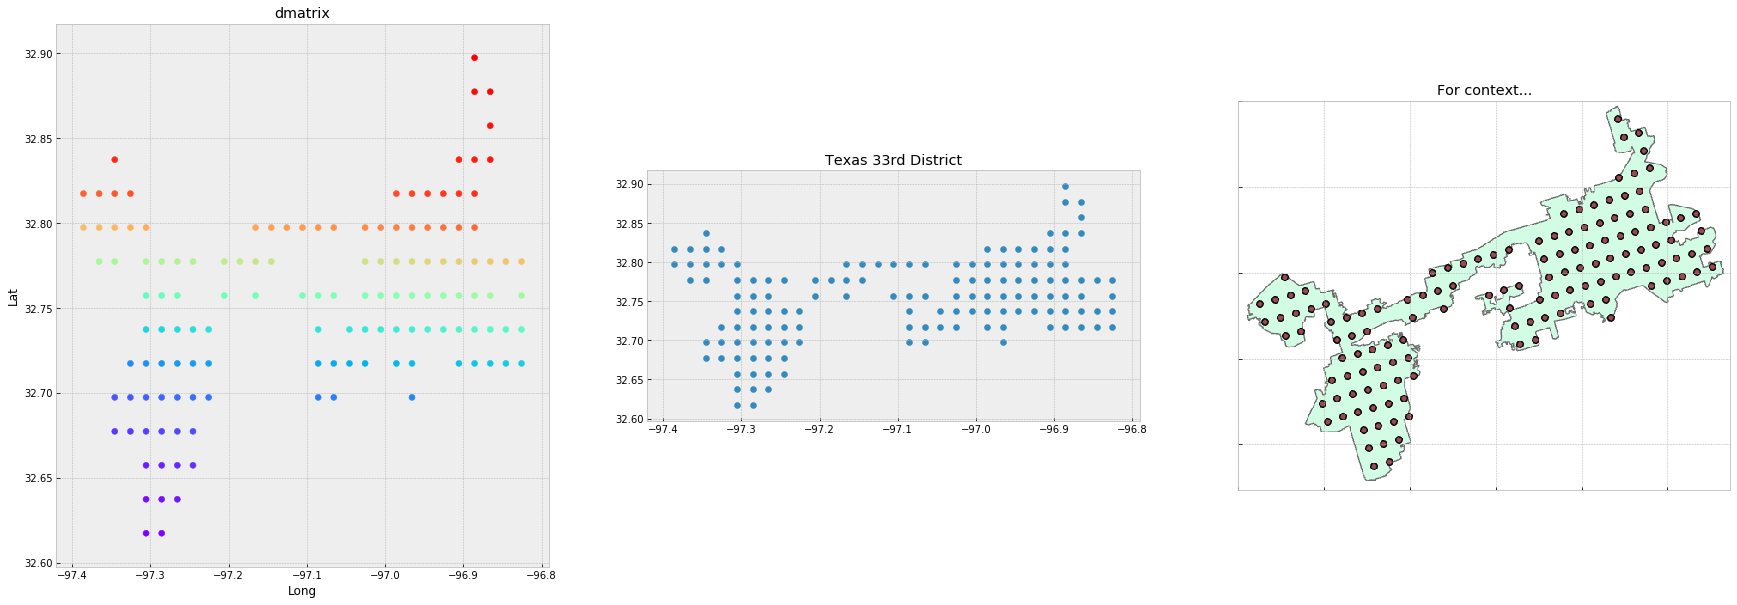

In [2]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

# This queues up the distance matrix from the distance API notebook.
dmatrix = pd.read_pickle('Shapes/Texas/0.02 grid/TX_33_grid_2_clip.pkl')

# Creates a list of points from the dataframe header to plot.
geopoints = list(dmatrix)

# Plots the points from the distance matrix headings.
lat = []
long = []
for point in geopoints:
    long.append(point[0])
    lat.append(point[1])
    
# Compares to the shapefile.
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

# Plots the original matrix.
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(geopoints)))
ax1.scatter(lat,long, c = colors)
ax1.set_title('dmatrix')
ax1.set_ylabel('Lat')
ax1.set_xlabel('Long')

# Plots the district shapefile with the original points.
pts = 'Shapes/Texas/0.02 grid/TX_33_grid_2_clip.shp'
CD_grid = gpd.read_file(pts)
CD_grid.plot(ax=ax2)
ax2.set_title('Texas 33rd District')

# Plots the point grid for the district on top of a basemap.
img = plt.imread('Shapes/Pictures/TX_33_0.02.png')
ax3.imshow(img)
ax3.set_title('For context...')
ax3.set_yticklabels([])
ax3.set_xticklabels([])
print('Process Complete.')

In [3]:
from sklearn import manifold
import numpy as np
from sklearn.metrics import pairwise_distances

# This removes a NaN at the intersection of the final row/column.
ttm = dmatrix.fillna(0)  # ttm = travel time matrix

# Showing the Travel Time Matrix to check nothing has changed since saving the distance matrix in the Bing API notebook.
ttm

,"(32.617376999999856, -97.30564600000186)","(32.617376999999856, -97.28564600000186)","(32.63737699999986, -97.30564600000186)","(32.63737699999986, -97.28564600000186)","(32.63737699999986, -97.26564600000187)","(32.657376999999855, -97.30564600000186)","(32.657376999999855, -97.28564600000186)","(32.657376999999855, -97.26564600000187)","(32.657376999999855, -97.24564600000187)","(32.67737699999985, -97.34564600000185)",...,"(32.81737699999985, -96.90564600000194)","(32.81737699999985, -96.88564600000194)","(32.83737699999985, -97.34564600000185)","(32.83737699999985, -96.90564600000194)","(32.83737699999985, -96.88564600000194)","(32.83737699999985, -96.86564600000195)","(32.85737699999985, -96.86564600000195)","(32.87737699999985, -96.88564600000194)","(32.87737699999985, -96.86564600000195)","(32.89737699999985, -96.88564600000194)"
"(32.617376999999856, -97.30564600000186)",0,301,337,555,726,630,749,850,850,832,...,2742,2885,1642,2915,3200,3142,3073,3041,3355,3093
"(32.617376999999856, -97.28564600000186)",301,0,552,431,614,844,701,811,990,1046,...,2940,3043,1854,3072,3355,3338,3231,3233,3555,3302
"(32.63737699999986, -97.30564600000186)",337,552,0,579,790,408,630,782,799,912,...,2721,2871,1771,2884,3168,3114,3035,3012,3326,3079
"(32.63737699999986, -97.28564600000186)",555,431,579,0,519,618,340,516,653,838,...,2564,2705,1740,2724,3007,2947,2871,2853,3159,2921
"(32.63737699999986, -97.26564600000187)",726,614,790,519,0,750,583,410,602,983,...,2507,2647,1887,2667,2950,2887,2812,2796,3099,2862
"(32.657376999999855, -97.30564600000186)",630,844,408,618,750,0,381,495,490,582,...,2385,2524,1560,2541,2826,2760,2687,2672,2971,2735
"(32.657376999999855, -97.28564600000186)",749,701,630,340,583,381,0,288,425,610,...,2315,2451,1510,2470,2755,2689,2615,2601,2897,2665
"(32.657376999999855, -97.26564600000187)",850,811,782,516,410,495,288,0,326,722,...,2226,2357,1621,2379,2665,2596,2523,2511,2804,2575
"(32.657376999999855, -97.24564600000187)",850,990,799,653,602,490,425,326,0,730,...,2253,2387,1631,2407,2693,2626,2551,2538,2833,2602
"(32.67737699999985, -97.34564600000185)",832,1046,912,838,983,582,610,722,730,0,...,2633,2777,1586,2794,3077,3020,2943,2923,3235,2989


The point geometry is stored as a tuple in the dataframe index and header, the first row and column. After passing the distance matrix to the pairwise_distance function, the header and index get re-assigned to intiger values. The unique combination function used in the Bing API function to create the matrix randomized the points. This is shown in the left plot above, which should show a smooth color ramp that instead is randomized.

In [4]:
# This passes the travel time matrix to a pairwise_distance function.
# Check https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html for more information.
D = pairwise_distances(ttm)
D.shape

# Passes the pairwise_distance array back to pandas dataframe for a better visualization.
edm = pd.DataFrame(D)  #edm = euclidean distance matrix

edm

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.000000,2120.475183,1156.028114,2406.802651,3114.484066,4042.605472,4792.482342,5565.180680,5298.914417,2242.918857,...,16264.174925,16424.812510,6757.282368,16319.253690,16507.895444,16945.690278,16441.604605,16761.231965,17254.170163,16448.655538
1,2120.475183,0.000000,2436.408833,3892.060380,4354.314871,5881.431628,6584.168740,7268.459465,7017.237134,3869.567159,...,16708.626425,16794.435299,7639.577083,16753.962516,16567.996409,17150.122857,16684.658013,16941.836028,17143.593818,16662.722467
2,1156.028114,2436.408833,0.000000,1912.064329,2529.333509,3635.312366,4440.763448,5148.446853,4871.946326,2333.415522,...,15915.446177,16092.144139,6911.271084,15989.859349,16200.806739,16632.288838,16122.538231,16440.520795,16960.438054,16133.689349
3,2406.802651,3892.060380,1912.064329,0.000000,1315.735536,2264.473890,2815.971591,3499.869283,3299.138524,2253.562513,...,15429.374031,15674.378935,7040.864862,15531.611056,16050.116791,16359.716685,15825.200441,16184.433076,16948.268378,15870.324886
4,3114.484066,4354.314871,2529.333509,1315.735536,0.000000,2494.000000,2964.990051,3225.671868,3022.540819,2885.879069,...,14762.642142,15013.952544,7214.190876,14872.273801,15411.352861,15711.684951,15176.244891,15541.815402,16337.003428,15224.721804
5,4042.605472,5881.431628,3635.312366,2264.473890,2494.000000,0.000000,1079.223795,1887.675025,1652.879608,2938.152821,...,15222.921566,15539.487218,7181.808547,15329.131091,16231.299486,16385.009796,15825.568078,16244.613815,17285.945534,15906.153966
6,4792.482342,6584.168740,4440.763448,2815.971591,2964.990051,1079.223795,0.000000,1201.611834,1212.063117,3654.050903,...,15218.696101,15564.988179,7508.464956,15334.458191,16383.325090,16476.127033,15908.968194,16346.541653,17493.816536,16005.299247
7,5565.180680,7268.459465,5148.446853,3499.869283,3225.671868,1887.675025,1201.611834,0.000000,650.376814,4450.787458,...,14671.398025,15044.947790,7926.103898,14801.339973,15969.685845,16011.426014,15440.008873,15893.916792,17138.837592,15549.939518
8,5298.914417,7017.237134,4871.946326,3299.138524,3022.540819,1652.879608,1212.063117,650.376814,0.000000,4154.939109,...,14591.583670,14950.734898,7684.516055,14712.815400,15822.124889,15889.322673,15319.882571,15769.773651,16971.271785,15422.347195
9,2242.918857,3869.567159,2333.415522,2253.562513,2885.879069,2938.152821,3654.050903,4450.787458,4154.939109,0.000000,...,15935.654772,16141.495129,6557.743667,15988.132599,16411.068369,16756.042074,16232.328206,16595.925283,17264.910223,16265.526613


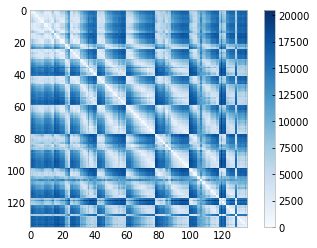

In [5]:
# Visualizing the pairwise_distance array.
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();


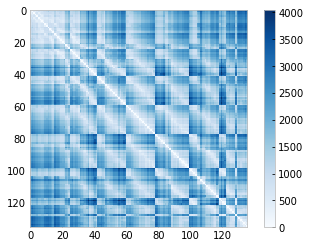

In [6]:
# Visualizing the precomputed travel time matrix array.
plt.imshow(ttm, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

[[-1047.44589681 -1327.68189803]
 [-1061.47725824 -1559.16979836]
 [ -909.22668602 -1377.60848205]
 [ -750.82092094 -1240.31074948]
 [ -590.63224413 -1275.34526012]
 [ -730.34882681  -983.17155978]
 [ -692.39570059  -897.07764995]
 [ -572.68635205  -843.01030251]
 [ -576.21845237  -877.83108121]
 [-1054.31456163 -1117.99325902]
 [-1127.20325495 -1065.64577256]
 [ -761.85432101 -1532.04032415]
 [ -870.59633918 -1154.23939653]
 [ -774.88370156  -831.43792823]
 [ -542.53227083  -593.28808751]
 [-1476.32075985 -1162.30724168]
 [-1244.63441634  -940.17112088]
 [-1189.70545921  -895.18687823]
 [-1037.74858583  -774.47270182]
 [ -759.57690935  -508.06184167]
 [ -692.16243526  -535.10430112]
 [ -653.40566272  -524.96491654]
 [  314.31537875  -921.48635908]
 [  261.88064774  -581.27685668]
 [  803.50198607  -465.51639724]
 [-1281.28102767  -594.50397139]
 [-1285.44870019  -699.313898  ]
 [ -881.49406223  -465.73354307]
 [-1063.06699378  -523.89467839]
 [ -851.06068316  -635.11662543]
 [ -675.63

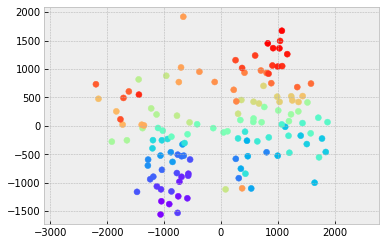

In [7]:
# This makes a copy of the travel time matrix.
ttm2 = ttm

# This performs the multidimensional scaling (MDS).
# Note: The MDS is rotated 90 degrees counterclockwise. This is fixed in the next step.
model = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(ttm2)
plt.scatter(out[:, 0], out[:, 1], c=colors)
plt.axis('equal');
print(out)

[]

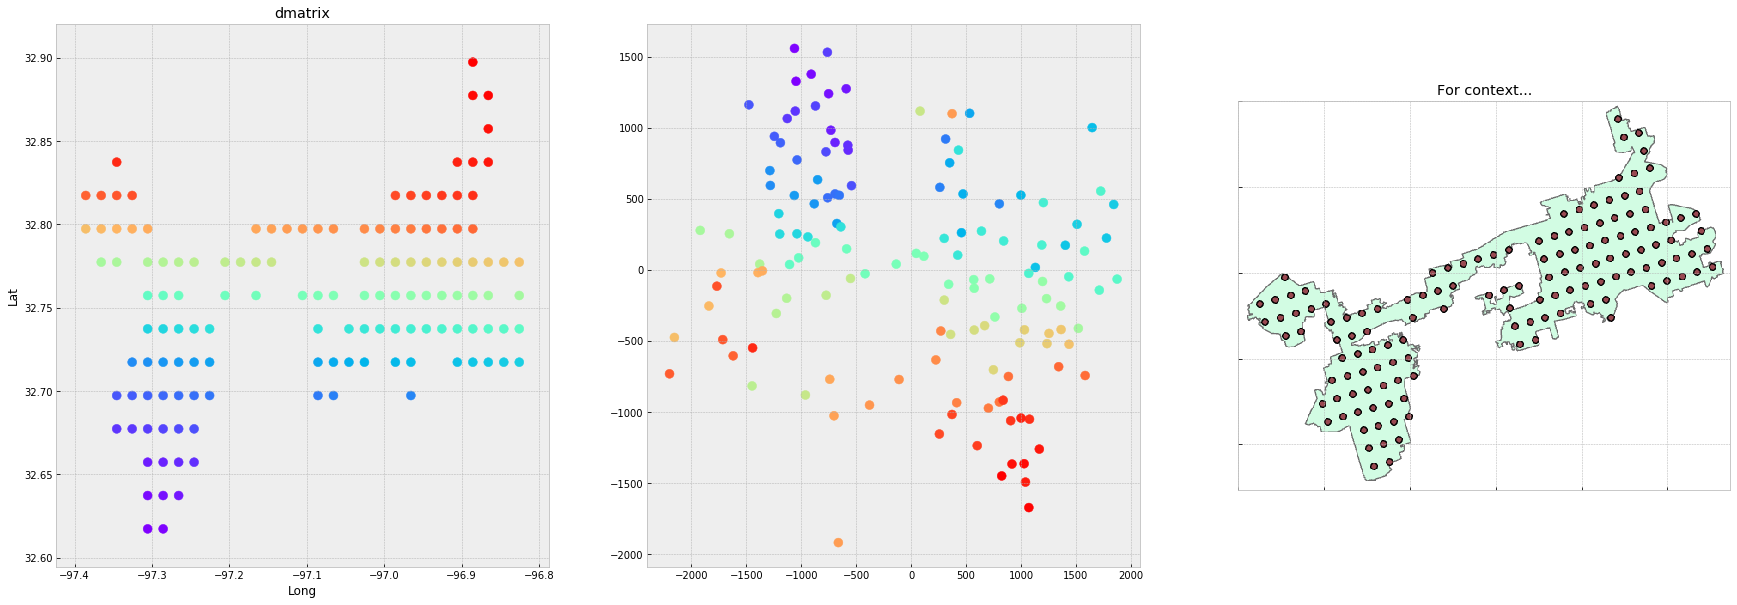

In [8]:
# Comparing the original and the MDS results.
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

# This sets the colors for the points.
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(geopoints)))

ax1.scatter(lat,long, s = 80,  c = colors)
ax1.set_title('dmatrix')
ax1.set_ylabel('Lat')
ax1.set_xlabel('Long')

# Adding a '-' inverts the y value, rotating the MDS to the correct position.
ax2.scatter(out[:, 0], -out[:, 1],s = 80, c = colors)

img = plt.imread('Shapes/Pictures/TX_33_0.02.png')
ax3.imshow(img)
ax3.set_title('For context...')
ax3.set_yticklabels([])
ax3.set_xticklabels([])

### Creating data for the Distance Formula

This next code starts the process to create the data for use in the distance formula. These will then be saved in order to be appeneded with the longitude and latitude of the points from before the multidimensional scaling. These points will then be fed through the distance formula.

In [9]:
# Gets the location of the MDS points.

dataframe1 = pd.DataFrame(out, columns=['Latitude', 'Longitude'])
dataframe2 = pd.DataFrame()
print(dataframe)

NameError: name 'dataframe' is not defined

### Distance Formula

This is a massively simplified version of the final distance formula. These distances will be calculated then stored along with the points from above. In order to better accomplish this, a loop will be utilized that will automatically feed through the points above and apply the distance formula to it, then store that value. 

In [ ]:
import math

def distance (x1,y1,x2,y2)
    sq = ((x1-x2)**2 + (y1-y2)**2)